Question 3. Data pre-processing: This involves transforming raw data into an understandable format.

In [266]:
# main libraries
import pandas as pd
import numpy as np
import time
# visual libraries
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
import pylab as pl
plt.style.use('ggplot')
# sklearn libraries
import sklearn 
plt.style.use('ggplot')
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import classification_report, confusion_matrix

In [267]:
#Importing Dataset
data = pd.read_csv('card.csv', sep=',', skiprows=range(0, 1))

In [268]:
#Check if there are any duplicate IDs
duplicate_column_df = data[data["ID"].duplicated()] #no duplicate IDs

In [269]:
#Set ID as index
data.set_index('ID', inplace = True)

In [270]:
#Remove rows with BILL_AMTs and PAY_AMTs = 0 
indexNames = data[(data['BILL_AMT1'] == 0 ) & (data['BILL_AMT2'] == 0 ) & (data['BILL_AMT3'] == 0 )& 
                 (data['BILL_AMT4'] == 0 ) & (data['BILL_AMT5'] == 0) & (data['BILL_AMT6'] == 0) ].index
data = data.drop(indexNames)

In [271]:
#Check if there are irrelevant data in Marriage (categorical data)
data["MARRIAGE"].unique() # 0 is irrelevant datas

array([1, 2, 3, 0], dtype=int64)

In [272]:
#Check if there are irrelevant in Education (categorical data)
data["EDUCATION"].unique() # 6 and 0 are  irrelevant datas 

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [273]:
data["EDUCATION"].value_counts()

2    13735
1    10158
3     4785
5      273
4      120
6       49
0       14
Name: EDUCATION, dtype: int64

In [274]:
#Check if there are irrelevant in PAY_0 (categorical data)
data["PAY_0"].unique() #-2 and 0 are irrelevant datas 

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

In [275]:
#Check if there are irrelevant in PAY_0 to PAY_5 (categorical data)
data["PAY_0"].unique() 
data["PAY_2"].unique()
data["PAY_3"].unique()
data["PAY_4"].unique()
data["PAY_5"].unique()

array([-2,  0, -1,  2,  3,  5,  4,  7,  8,  6], dtype=int64)

In [276]:
#Remove rows which values are not justified in the data description (Marriage == 0, PAY == 0 & -2, EDUCATION == 0 & 6)
data.drop(data[data["MARRIAGE"] == 0].index, inplace=True)
data.drop(data[data["PAY_0"] == 0].index, inplace=True)
data.drop(data[data["PAY_2"] == 0].index, inplace=True)
data.drop(data[data["PAY_3"] == 0].index, inplace=True)
data.drop(data[data["PAY_4"] == 0].index, inplace=True)
data.drop(data[data["PAY_5"] == 0].index, inplace=True)
data.drop(data[data["PAY_6"] == 0].index, inplace=True)
data.drop(data[data["PAY_0"] == -2].index, inplace=True)
data.drop(data[data["PAY_2"] == -2].index, inplace=True)
data.drop(data[data["PAY_3"] == -2].index, inplace=True)
data.drop(data[data["PAY_4"] == -2].index, inplace=True)
data.drop(data[data["PAY_5"] == -2].index, inplace=True)
data.drop(data[data["PAY_6"] == -2].index, inplace=True)
data.drop(data[data["EDUCATION"] == 0].index, inplace=True)
data.drop(data[data["EDUCATION"] == 5].index, inplace=True)
data.drop(data[data["EDUCATION"] == 6].index, inplace=True)

In [277]:
##Checking for missing values
data.isna().sum() #no missing value

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [278]:
#Renaming the data column for better understanding of the dataset
data.rename(columns = {'PAY_0' : 'STATUS_SEP'}, inplace = True)
data.rename(columns = {'PAY_2' : 'STATUS_AUG'}, inplace = True)
data.rename(columns = {'PAY_3' : 'STATUS_JUL'}, inplace = True)
data.rename(columns = {'PAY_4' : 'STATUS_JUN'}, inplace = True)
data.rename(columns = {'PAY_5' : 'STATUS_MAY'}, inplace = True)
data.rename(columns = {'PAY_6' : 'STATUS_APR'}, inplace = True)
data.rename(columns = {'BILL_AMT1' : 'BILL_SEP'}, inplace = True)
data.rename(columns = {'BILL_AMT2' : 'BILL_AUG'}, inplace = True)
data.rename(columns = {'BILL_AMT3' : 'BILL_JUL'}, inplace = True)
data.rename(columns = {'BILL_AMT4' : 'BILL_JUN'}, inplace = True)
data.rename(columns = {'BILL_AMT5' : 'BILL_MAY'}, inplace = True)
data.rename(columns = {'BILL_AMT6' : 'BILL_APR'}, inplace = True)
data.rename(columns = {'PAY_AMT1' : 'PAY_SEP'}, inplace = True)
data.rename(columns = {'PAY_AMT2' : 'PAY_AUG'}, inplace = True)
data.rename(columns = {'PAY_AMT3' : 'PAY_JUL'}, inplace = True)
data.rename(columns = {'PAY_AMT4' : 'PAY_JUN'}, inplace = True)
data.rename(columns = {'PAY_AMT5' : 'PAY_MAY'}, inplace = True)
data.rename(columns = {'PAY_AMT6' : 'PAY_APR'}, inplace = True)
data.rename(columns = {'default payment next month' : 'default'}, inplace = True)

In [279]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,STATUS_SEP,STATUS_AUG,STATUS_JUL,STATUS_JUN,STATUS_MAY,...,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,default
ID,,,,,,,,,,,,,,,,,,,,,
12,260000,2,1,2,51,-1,-1,-1,-1,-1,...,8517,22287,13668,21818,9966,8583,22301,0,3640,0
22,120000,2,2,1,39,-1,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
29,50000,2,3,1,47,-1,-1,-1,-1,-1,...,2040,30430,257,3415,3421,2044,30430,257,0,0
31,230000,2,1,2,27,-1,-1,-1,-1,-1,...,15339,14307,36923,17270,13281,15339,14307,37292,0,0
49,380000,1,2,2,32,-1,-1,-1,-1,-1,...,32018,11849,11873,21540,15138,24677,11851,11875,8251,0


In [280]:
#Type of data 
type(data)

pandas.core.frame.DataFrame

In [281]:
#Information about the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4030 entries, 12 to 29995
Data columns (total 24 columns):
LIMIT_BAL     4030 non-null int64
SEX           4030 non-null int64
EDUCATION     4030 non-null int64
MARRIAGE      4030 non-null int64
AGE           4030 non-null int64
STATUS_SEP    4030 non-null int64
STATUS_AUG    4030 non-null int64
STATUS_JUL    4030 non-null int64
STATUS_JUN    4030 non-null int64
STATUS_MAY    4030 non-null int64
STATUS_APR    4030 non-null int64
BILL_SEP      4030 non-null int64
BILL_AUG      4030 non-null int64
BILL_JUL      4030 non-null int64
BILL_JUN      4030 non-null int64
BILL_MAY      4030 non-null int64
BILL_APR      4030 non-null int64
PAY_SEP       4030 non-null int64
PAY_AUG       4030 non-null int64
PAY_JUL       4030 non-null int64
PAY_JUN       4030 non-null int64
PAY_MAY       4030 non-null int64
PAY_APR       4030 non-null int64
default       4030 non-null int64
dtypes: int64(24)
memory usage: 787.1 KB


In [282]:
#We have identified SEX and MARRIAGE to be nominal discrete attributes, hence,
#we will perform data encoding on these 2 attributes. 

#Renaming variables to their categorical attribute
data['SEX'].replace(1,'MALE', inplace=True)
data['SEX'].replace(2,'FEMALE', inplace=True)
data['MARRIAGE'].replace(1,'MARRIED',inplace=True)
data['MARRIAGE'].replace(2,'SINGLE',inplace=True)
data['MARRIAGE'].replace(3,'OTHERS',inplace=True)

In [283]:
#Method to encoded SEX and MARRIAGE columns
dummies = pd.get_dummies(data=data, columns=['SEX', 'MARRIAGE'])
data = dummies
cols_at_end = ['default']
data = data[[c for c in data if c not in cols_at_end] + [c for c in cols_at_end if c in data]]
data.head()

,LIMIT_BAL,EDUCATION,AGE,STATUS_SEP,STATUS_AUG,STATUS_JUL,STATUS_JUN,STATUS_MAY,STATUS_APR,BILL_SEP,...,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,SEX_FEMALE,SEX_MALE,MARRIAGE_MARRIED,MARRIAGE_OTHERS,MARRIAGE_SINGLE,default
ID,,,,,,,,,,,,,,,,,,,,,
12,260000,1,51,-1,-1,-1,-1,-1,2,12261,...,8583,22301,0,3640,1,0,0,0,1,0
22,120000,2,39,-1,-1,-1,-1,-1,-1,316,...,0,632,316,0,1,0,1,0,0,1
29,50000,3,47,-1,-1,-1,-1,-1,-1,650,...,2044,30430,257,0,1,0,1,0,0,0
31,230000,1,27,-1,-1,-1,-1,-1,-1,16646,...,15339,14307,37292,0,1,0,0,0,1,0
49,380000,2,32,-1,-1,-1,-1,-1,-1,22401,...,24677,11851,11875,8251,0,1,0,0,1,0


In [284]:
#Reorder Education Ranking 
#1 = Graduate School
#2 = High School
#3 = University 
#4 = Others (Assume Masters )

data['EDUCATION'].replace(2,4, inplace=True)
data['EDUCATION'].replace(3,2, inplace=True)
data['EDUCATION'].replace(4,3, inplace=True)

C:\Users\Huang\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [285]:
data.head()

,LIMIT_BAL,EDUCATION,AGE,STATUS_SEP,STATUS_AUG,STATUS_JUL,STATUS_JUN,STATUS_MAY,STATUS_APR,BILL_SEP,...,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,SEX_FEMALE,SEX_MALE,MARRIAGE_MARRIED,MARRIAGE_OTHERS,MARRIAGE_SINGLE,default
ID,,,,,,,,,,,,,,,,,,,,,
12,260000,1,51,-1,-1,-1,-1,-1,2,12261,...,8583,22301,0,3640,1,0,0,0,1,0
22,120000,3,39,-1,-1,-1,-1,-1,-1,316,...,0,632,316,0,1,0,1,0,0,1
29,50000,2,47,-1,-1,-1,-1,-1,-1,650,...,2044,30430,257,0,1,0,1,0,0,0
31,230000,1,27,-1,-1,-1,-1,-1,-1,16646,...,15339,14307,37292,0,1,0,0,0,1,0
49,380000,3,32,-1,-1,-1,-1,-1,-1,22401,...,24677,11851,11875,8251,0,1,0,0,1,0


In [286]:
#Chi Square test for MALE and Default
chi2_contingency(pd.crosstab(data.SEX_MALE, data.default))
# Since P-value is < 0.05, MALE and default are dependent

(14.216362495725253,
 0.0001629474490475851,
 1,
 array([[1535.15880893,  849.84119107],
        [1058.84119107,  586.15880893]]))

In [287]:
#Chi Square test for FEMALE and Default
chi2_contingency(pd.crosstab(data.SEX_FEMALE, data.default))
# Since P-value is < 0.05, FEMALE and default are dependent

(14.216362495725253,
 0.0001629474490475851,
 1,
 array([[1058.84119107,  586.15880893],
        [1535.15880893,  849.84119107]]))

In [288]:
#Chi Square test for Education and Default
chi2_contingency(pd.crosstab(data.EDUCATION, data.default))
# Since P-value is < 0.05, Education and Default are dependent

(68.43577734733543,
 1.3783508126893269e-15,
 2,
 array([[1083.30074442,  599.69925558],
        [ 401.6516129 ,  222.3483871 ],
        [1109.04764268,  613.95235732]]))

In [289]:
#Chi Square test for SINGLE and Default
chi2_contingency(pd.crosstab(data.MARRIAGE_SINGLE, data.default))
# Since P-value is > 0.05, SINGLE and Default are independent

(0.17494728950595756,
 0.6757519089000386,
 1,
 array([[1358.14888337,  751.85111663],
        [1235.85111663,  684.14888337]]))

In [290]:
#Chi Square test for MARRIED and Default
chi2_contingency(pd.crosstab(data.MARRIAGE_MARRIED, data.default))
# Since P-value is > 0.05, MARRIED and Default are independent

(0.5468405918800932,
 0.4596115078241867,
 1,
 array([[1257.73598015,  696.26401985],
        [1336.26401985,  739.73598015]]))

In [291]:
#Chi Square test for MARRIED and Default
chi2_contingency(pd.crosstab(data.MARRIAGE_OTHERS, data.default))
# Since P-value is > 0.05, MARRIED and Default are independent

(2.4865574152284675,
 0.11482263717182488,
 1,
 array([[2572.11513648, 1423.88486352],
        [  21.88486352,   12.11513648]]))

In [292]:
#Since Chi Square test can only be used with positive variables, we will change the -1 values for 
#STATUS_SEP to STATUS_APR to 10 (paid on time)

data[data.columns[3:9]] = data[data.columns[3:9]].replace(-1,0) #replace -1 values with 0 
data.head()

,LIMIT_BAL,EDUCATION,AGE,STATUS_SEP,STATUS_AUG,STATUS_JUL,STATUS_JUN,STATUS_MAY,STATUS_APR,BILL_SEP,...,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,SEX_FEMALE,SEX_MALE,MARRIAGE_MARRIED,MARRIAGE_OTHERS,MARRIAGE_SINGLE,default
ID,,,,,,,,,,,,,,,,,,,,,
12,260000,1,51,0,0,0,0,0,2,12261,...,8583,22301,0,3640,1,0,0,0,1,0
22,120000,3,39,0,0,0,0,0,0,316,...,0,632,316,0,1,0,1,0,0,1
29,50000,2,47,0,0,0,0,0,0,650,...,2044,30430,257,0,1,0,1,0,0,0
31,230000,1,27,0,0,0,0,0,0,16646,...,15339,14307,37292,0,1,0,0,0,1,0
49,380000,3,32,0,0,0,0,0,0,22401,...,24677,11851,11875,8251,0,1,0,0,1,0


In [293]:
#Chi Square test for STATUS_SEP and default
chi2_contingency(pd.crosstab(data.STATUS_SEP, data.default))
# Since P-value is < 0.05, STATUS_SEP and Default are dependent

(1071.9511104410667,
 4.370093747720005e-226,
 8,
 array([[1.52550372e+03, 8.44496278e+02],
        [4.08088337e+02, 2.25911663e+02],
        [5.09144913e+02, 2.81855087e+02],
        [1.04274938e+02, 5.77250620e+01],
        [2.18848635e+01, 1.21151365e+01],
        [5.14937965e+00, 2.85062035e+00],
        [1.93101737e+00, 1.06898263e+00],
        [5.79305211e+00, 3.20694789e+00],
        [1.22297767e+01, 6.77022333e+00]]))

In [294]:
#Chi Square test for STATUS_AUG and default
chi2_contingency(pd.crosstab(data.STATUS_AUG, data.default))
# Since P-value is < 0.05, STATUS_AUG and Default are dependent

(1032.9932692855323,
 1.1270361945654215e-217,
 8,
 array([[1.57249181e+03, 8.70508189e+02],
        [2.57468983e+00, 1.42531017e+00],
        [8.63808437e+02, 4.78191563e+02],
        [9.01141439e+01, 4.98858561e+01],
        [3.73330025e+01, 2.06669975e+01],
        [6.43672457e+00, 3.56327543e+00],
        [7.72406948e+00, 4.27593052e+00],
        [1.28734491e+01, 7.12655087e+00],
        [6.43672457e-01, 3.56327543e-01]]))

In [295]:
#Chi Square test for STATUS_JUL and default
chi2_contingency(pd.crosstab(data.STATUS_JUL, data.default))
# Since P-value is < 0.05, STATUS_JUL and Default are dependent

(981.2401554605125,
 1.6716698582981148e-206,
 8,
 array([[1.56348040e+03, 8.65519603e+02],
        [6.43672457e-01, 3.56327543e-01],
        [8.71532506e+02, 4.82467494e+02],
        [7.91717122e+01, 4.38282878e+01],
        [3.21836228e+01, 1.78163772e+01],
        [1.28734491e+01, 7.12655087e+00],
        [1.48044665e+01, 8.19553350e+00],
        [1.73791563e+01, 9.62084367e+00],
        [1.93101737e+00, 1.06898263e+00]]))

In [296]:
#Chi Square test for STATUS_JUN and default
chi2_contingency(pd.crosstab(data.STATUS_JUN, data.default))
# Since P-value is < 0.05, STATUS_JUN and Default are dependent

(1033.7951233615956,
 7.56530541048944e-218,
 8,
 array([[1.62012357e+03, 8.96876427e+02],
        [6.43672457e-01, 3.56327543e-01],
        [8.01372208e+02, 4.43627792e+02],
        [6.88729529e+01, 3.81270471e+01],
        [3.99076923e+01, 2.20923077e+01],
        [2.18848635e+01, 1.21151365e+01],
        [2.57468983e+00, 1.42531017e+00],
        [3.73330025e+01, 2.06669975e+01],
        [1.28734491e+00, 7.12655087e-01]]))

In [297]:
#Chi Square test for STATUS_MAY and default
chi2_contingency(pd.crosstab(data.STATUS_MAY, data.default))
# Since P-value is < 0.05, STATUS_MAY and Default are dependent

(1055.3728694589097,
 1.3035129394978537e-223,
 7,
 array([[1.65166352e+03, 9.14336476e+02],
        [7.60820844e+02, 4.21179156e+02],
        [8.43210918e+01, 4.66789082e+01],
        [4.82754342e+01, 2.67245658e+01],
        [9.01141439e+00, 4.98858561e+00],
        [2.57468983e+00, 1.42531017e+00],
        [3.66893300e+01, 2.03106700e+01],
        [6.43672457e-01, 3.56327543e-01]]))

In [298]:
#Chi Square test for STATUS_APR and default
chi2_contingency(pd.crosstab(data.STATUS_APR, data.default))
# Since P-value is < 0.05, STATUS_APR and Default are dependent

(1007.957072772629,
 2.2988568833655303e-213,
 7,
 array([[1.62720397e+03, 9.00796030e+02],
        [8.12314640e+02, 4.49685360e+02],
        [8.04590571e+01, 4.45409429e+01],
        [2.63905707e+01, 1.46094293e+01],
        [7.08039702e+00, 3.91960298e+00],
        [9.65508685e+00, 5.34491315e+00],
        [2.96089330e+01, 1.63910670e+01],
        [1.28734491e+00, 7.12655087e-01]]))

In [299]:
#After doing Chi Square test for categorical variables and Logistic Regression for continuous variables
#We remove all marriages as its p value is > 0.05, which indicates that the MARRIAGE is independent of default 

data.drop(columns = ['MARRIAGE_SINGLE'], inplace = True)
data.drop(columns = ['MARRIAGE_MARRIED'], inplace = True)
data.drop(columns = ['MARRIAGE_OTHERS'], inplace = True)

In [300]:
corr = data[data.columns[9:15]].corr()
corr.style.background_gradient(cmap = 'coolwarm')

,BILL_SEP,BILL_AUG,BILL_JUL,BILL_JUN,BILL_MAY,BILL_APR
BILL_SEP,1,0.955722,0.949824,0.925006,0.933507,0.905779
BILL_AUG,0.955722,1,0.957013,0.942918,0.942664,0.914697
BILL_JUL,0.949824,0.957013,1,0.945363,0.950457,0.922508
BILL_JUN,0.925006,0.942918,0.945363,1,0.949492,0.926353
BILL_MAY,0.933507,0.942664,0.950457,0.949492,1,0.946128
BILL_APR,0.905779,0.914697,0.922508,0.926353,0.946128,1


In [301]:
def retrieveCorr(data):
    corr = data[data.columns[9:15]].corr()
    columns = np.full((corr.shape[0],), True, dtype=bool)
    realmax = 0
    maxbilli = 0
    for i in range(6):
        maxinside = 0
        for j in range(6):
            maxinside += corr.iloc[i,j]
        maxinside /= 6
        if maxinside > realmax:
            realmax = maxinside
            maxbilli = i
        else:
            continue
    print(corr.columns[maxbilli])

In [302]:
retrieveCorr(data)
#BILL_JUL has the highest average correlation across all bills, hence, we keep this and remove the rest. 

BILL_JUL


In [303]:
# Dropping all BILLs except BILL_JUL
data.drop(columns = ['BILL_SEP', 'BILL_JUN', 'BILL_AUG', 'BILL_MAY', 'BILL_APR'], inplace = True)

In [304]:
#Feature Scaling
#This will help to limit the range and standerdise the variables so that they can all be compared on common grounds. 
#If they do not have the same scale, it will cause problems to the machine learning that we will be applying later on(as most machine learning models is based on euclidean distance). 
#This algorithm will also converge faster.

data['LIMIT_BAL'] = StandardScaler().fit_transform(data['LIMIT_BAL'].values.reshape(-1,1))
data['BILL_JUL'] = StandardScaler().fit_transform(data['BILL_JUL'].values.reshape(-1,1))
data['PAY_SEP'] = StandardScaler().fit_transform(data['PAY_SEP'].values.reshape(-1,1))
data['PAY_AUG'] = StandardScaler().fit_transform(data['PAY_AUG'].values.reshape(-1,1))
data['PAY_JUL'] = StandardScaler().fit_transform(data['PAY_JUL'].values.reshape(-1,1))
data['PAY_JUN'] = StandardScaler().fit_transform(data['PAY_JUN'].values.reshape(-1,1))
data['PAY_MAY'] = StandardScaler().fit_transform(data['PAY_MAY'].values.reshape(-1,1))
data['PAY_APR'] = StandardScaler().fit_transform(data['PAY_APR'].values.reshape(-1,1))

In [305]:
#Describing the data
data.head()

,LIMIT_BAL,EDUCATION,AGE,STATUS_SEP,STATUS_AUG,STATUS_JUL,STATUS_JUN,STATUS_MAY,STATUS_APR,BILL_JUL,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,SEX_FEMALE,SEX_MALE,default
ID,,,,,,,,,,,,,,,,,,,
12,0.701530,1,51,0,0,0,0,0,2,-0.277813,1.577344,0.447169,0.288158,1.600493,-0.340261,-0.063545,1,0,0
22,-0.410215,3,39,0,0,0,0,0,0,-0.494797,-0.398662,-0.358458,-0.351930,-0.352972,-0.316917,-0.307007,1,0,1
29,-0.966087,2,47,0,0,0,0,0,0,-0.425092,-0.113868,-0.099238,-0.199497,2.333324,-0.321275,-0.307007,1,0,0
31,0.463299,1,27,0,0,0,0,0,0,-0.203611,1.159389,0.723921,0.791995,0.879832,2.414677,-0.307007,1,0,0
49,1.654455,3,32,0,0,0,0,0,0,-0.161608,1.551796,0.878952,1.488389,0.658423,0.537002,0.244862,0,1,0


In [311]:
data.to_csv("processed_data_BT2101.csv")

In [312]:
#spliiting test and train set (to be done after feature selection)

from sklearn.model_selection import train_test_split
x = data.iloc[:, :-1].values
y = data["default"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [313]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3224, 18), (3224,), (806, 18), (806,))

In [314]:
#SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import roc_curve, auc

In [315]:
#RBF Kernel
rbf_svc = SVC(kernel = 'rbf', C = 1, gamma = 0.01, probability = True)
rbf_svc.fit(x_train,y_train)

#Predict
y_rbf_pred = rbf_svc.predict(x_test)


In [324]:
#Evaluation
cm = confusion_matrix(y_test, y_rbf_pred)
cr = classification_report(y_test, y_rbf_pred)
print(cm)
print(cr)

acc_rbf = metrics.accuracy_score(y_test, y_rbf_pred)
prec_rbf = metrics.precision_score(y_test,y_rbf_pred)
rec_rbf = metrics.recall_score(y_test,y_rbf_pred)
f1_rbf = metrics.f1_score(y_test,y_rbf_pred)

#SSE
#Number of observations = 806
SSE = 806*(metrics.mean_squared_error(y_test, y_rbf_pred))
print('The SSE for RBF kernel is :' + str(SSE))

#MSE
MSE = metrics.mean_squared_error(y_test,y_rbf_pred)
print('The MSE for RBF kernel is :' + str(MSE))

#RMSE
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_rbf_pred))
print('The RMSE for RBF kernel is :' + str(RMSE))

#Adjusted R^2
var_test = y_test.var()
adj_rsquare = 1-(MSE/var_test)
print('The Adjusted R^2 for RBF kernel is :' + str(adj_rsquare))

#ROC 
prob_rbf = rbf_svc.fit(x_train, y_train).predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, prob_rbf[:, 1])
roc_auc = auc(fpr, tpr)
roc_rbf = metrics.roc_auc_score(y_test, y_rbf_pred)
print("The ROC is : %f" % roc_rbf)

model = pd.DataFrame([['Support Vector Machine', acc_rbf,prec_rbf,rec_rbf, f1_rbf,roc_rbf]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model


[[444  84]
 [ 85 193]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       528
           1       0.70      0.69      0.70       278

    accuracy                           0.79       806
   macro avg       0.77      0.77      0.77       806
weighted avg       0.79      0.79      0.79       806

The SSE for rbf kernel is :169.0
The MSE for rbf kernel is :0.20967741935483872
The RMSE for rbf kernel is :0.4579054698896255
The Adjusted R^2 for rbf kernel is :0.07316192500546082
The ROC is : 0.767577


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.790323,0.696751,0.694245,0.695495,0.767577


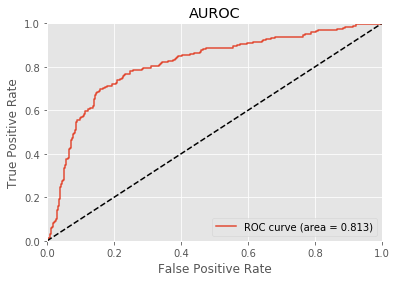

Area under the ROC curve : 0.813174


In [325]:
# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('AUROC')
pl.legend(loc="lower right")
pl.show()
print("Area under the ROC curve : %f" % roc_auc)

In [140]:
# Finding best parameter
# Grid Search
# Parameter Grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [10,1, 0.1, 0.01, 0.001]}
 
# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=5)
 
# Train the classifier
clf_grid.fit(x_train, y_train)
 
# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

C:\Users\Huang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.644, total=   1.2s
[CV] C=0.1, gamma=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ..................... C=0.1, gamma=10, score=0.644, total=   1.2s
[CV] C=0.1, gamma=10 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV] ..................... C=0.1, gamma=10, score=0.644, total=   1.7s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.644, total=   1.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.3s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.644, total=   0.7s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.644, total=   0.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.766, total=   0.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.738, total=   0.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.752, total=   0.5s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.797, total=   0.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.767, total=   0.5s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   45.4s finished


Best Parameters:
 {'C': 1, 'gamma': 0.001}
Best Estimators:
 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [257]:
#Sigmoid Kernel
sig_svc = SVC(kernel='sigmoid', gamma = 1, C = 0.1)
sig_svc.fit(x_train, y_train)
y_svc_pred = sig_svc.predict(x_test)

In [258]:
#Evaluation
cm = confusion_matrix(y_test, y_svc_pred)
cr = classification_report(y_test, y_svc_pred)
print(cm)
print(cr)
print(metrics.f1_score(y_test, y_svc_pred, average='weighted', labels=np.unique(y_svc_pred)))
print(metrics.precision_score(y_test, y_svc_pred, average= 'weighted', labels=np.unique(y_svc_pred)))

[[522   0]
 [284   0]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       522
           1       0.00      0.00      0.00       284

    accuracy                           0.65       806
   macro avg       0.32      0.50      0.39       806
weighted avg       0.42      0.65      0.51       806

0.786144578313253
0.6476426799007444


C:\Users\Huang\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [144]:
# Finding best parameter
# Grid Search
# Parameter Grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [10,1, 0.1, 0.01, 0.001]}
 
# Make grid search classifier
clf_grid = GridSearchCV(svm.SVC(kernel = 'sigmoid'), param_grid, verbose=5)
 
# Train the classifier
clf_grid.fit(x_train, y_train)
 
# clf = grid.best_estimator_()
print("Best Parameters:\n", clf_grid.best_params_)
print("Best Estimators:\n", clf_grid.best_estimator_)

C:\Users\Huang\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.644, total=   0.3s
[CV] C=0.1, gamma=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ..................... C=0.1, gamma=10, score=0.644, total=   0.3s
[CV] C=0.1, gamma=10 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ..................... C=0.1, gamma=10, score=0.644, total=   0.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.644, total=   0.4s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.644, total=   0.6s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.644, total=   0.7s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.644, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.644, total=   0.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.644, total=   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.644, total=   0.6s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.644, total=   0.6s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   27.2s finished


Best Parameters:
 {'C': 0.1, 'gamma': 10}
Best Estimators:
 SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [259]:
#Neural Network
import tensorflow as tf
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#defifne a sequentail Model
model = Sequential()

#Hidden Layer-1
model.add(Dense(100,activation='relu',input_dim=18,kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

#Hidden Layer-2
model.add(Dense(100,activation = 'relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

#Output layer
model.add(Dense(1,activation='sigmoid'))

ModuleNotFoundError: No module named 'tensorflow'

In [202]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

NameError: name 'model' is not defined

In [497]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               1900      
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 12,101
Trainable params: 12,101
Non-trainable params: 0
_________________________________________________________________


In [498]:
model_output = model.fit(x_train,y_train,epochs=500,batch_size=20,verbose=1,validation_data=(x_test,y_test),)

Train on 3233 samples, validate on 809 samples
Epoch 1/500
3233/3233 [==============================] - 1s 217us/step - loss: 1.4897 - accuracy: 0.6650 - val_loss: 0.9644 - val_accuracy: 0.8010
Epoch 2/500
3233/3233 [==============================] - 0s 62us/step - loss: 0.9369 - accuracy: 0.7269 - val_loss: 0.7981 - val_accuracy: 0.7985
Epoch 3/500
3233/3233 [==============================] - 0s 60us/step - loss: 0.8154 - accuracy: 0.7393 - val_loss: 0.7143 - val_accuracy: 0.7985
Epoch 4/500
3233/3233 [==============================] - 0s 61us/step - loss: 0.7390 - accuracy: 0.7572 - val_loss: 0.6605 - val_accuracy: 0.7973
Epoch 5/500
3233/3233 [==============================] - 0s 58us/step - loss: 0.6972 - accuracy: 0.7572 - val_loss: 0.6363 - val_accuracy: 0.7948
Epoch 6/500
3233/3233 [==============================] - 0s 60us/step - loss: 0.6536 - accuracy: 0.7597 - val_loss: 0.5929 - val_accuracy: 0.7985
Epoch 7/500
3233/3233 [==============================] - 0s 56us/step - loss

Epoch 112/500
3233/3233 [==============================] - 0s 61us/step - loss: 0.5167 - accuracy: 0.7689 - val_loss: 0.4900 - val_accuracy: 0.8047
Epoch 113/500
3233/3233 [==============================] - 0s 63us/step - loss: 0.5150 - accuracy: 0.7742 - val_loss: 0.4933 - val_accuracy: 0.7948
Epoch 114/500
3233/3233 [==============================] - 0s 61us/step - loss: 0.5180 - accuracy: 0.7782 - val_loss: 0.4959 - val_accuracy: 0.7973
Epoch 115/500
3233/3233 [==============================] - 0s 58us/step - loss: 0.5179 - accuracy: 0.7745 - val_loss: 0.4907 - val_accuracy: 0.7973
Epoch 116/500
3233/3233 [==============================] - 0s 59us/step - loss: 0.5165 - accuracy: 0.7727 - val_loss: 0.4923 - val_accuracy: 0.8022
Epoch 117/500
3233/3233 [==============================] - 0s 59us/step - loss: 0.5160 - accuracy: 0.7727 - val_loss: 0.4889 - val_accuracy: 0.8022
Epoch 118/500
3233/3233 [==============================] - 0s 62us/step - loss: 0.5168 - accuracy: 0.7779 - val_

3233/3233 [==============================] - 0s 61us/step - loss: 0.5137 - accuracy: 0.7773 - val_loss: 0.5082 - val_accuracy: 0.7726
Epoch 223/500
3233/3233 [==============================] - 0s 63us/step - loss: 0.5157 - accuracy: 0.7751 - val_loss: 0.4898 - val_accuracy: 0.7985
Epoch 224/500
3233/3233 [==============================] - 0s 71us/step - loss: 0.5164 - accuracy: 0.7764 - val_loss: 0.4904 - val_accuracy: 0.7998
Epoch 225/500
3233/3233 [==============================] - 0s 83us/step - loss: 0.5119 - accuracy: 0.7795 - val_loss: 0.4966 - val_accuracy: 0.7973
Epoch 226/500
3233/3233 [==============================] - 0s 68us/step - loss: 0.5166 - accuracy: 0.7727 - val_loss: 0.4948 - val_accuracy: 0.7960
Epoch 227/500
3233/3233 [==============================] - 0s 63us/step - loss: 0.5171 - accuracy: 0.7714 - val_loss: 0.4882 - val_accuracy: 0.7985
Epoch 228/500
3233/3233 [==============================] - 0s 61us/step - loss: 0.5143 - accuracy: 0.7720 - val_loss: 0.4892 -

3233/3233 [==============================] - 0s 58us/step - loss: 0.5160 - accuracy: 0.7751 - val_loss: 0.4889 - val_accuracy: 0.7948
Epoch 333/500
3233/3233 [==============================] - 0s 55us/step - loss: 0.5102 - accuracy: 0.7733 - val_loss: 0.4927 - val_accuracy: 0.7973
Epoch 334/500
3233/3233 [==============================] - 0s 57us/step - loss: 0.5154 - accuracy: 0.7751 - val_loss: 0.4888 - val_accuracy: 0.7948
Epoch 335/500
3233/3233 [==============================] - 0s 57us/step - loss: 0.5168 - accuracy: 0.7751 - val_loss: 0.4910 - val_accuracy: 0.7973
Epoch 336/500
3233/3233 [==============================] - 0s 58us/step - loss: 0.5155 - accuracy: 0.7739 - val_loss: 0.4871 - val_accuracy: 0.7985
Epoch 337/500
3233/3233 [==============================] - 0s 57us/step - loss: 0.5140 - accuracy: 0.7788 - val_loss: 0.4852 - val_accuracy: 0.8010
Epoch 338/500
3233/3233 [==============================] - 0s 59us/step - loss: 0.5135 - accuracy: 0.7720 - val_loss: 0.4883 -

3233/3233 [==============================] - 0s 57us/step - loss: 0.5172 - accuracy: 0.7739 - val_loss: 0.4863 - val_accuracy: 0.7973
Epoch 443/500
3233/3233 [==============================] - 0s 55us/step - loss: 0.5142 - accuracy: 0.7733 - val_loss: 0.4872 - val_accuracy: 0.7973
Epoch 444/500
3233/3233 [==============================] - 0s 55us/step - loss: 0.5130 - accuracy: 0.7754 - val_loss: 0.4890 - val_accuracy: 0.7973
Epoch 445/500
3233/3233 [==============================] - 0s 57us/step - loss: 0.5103 - accuracy: 0.7795 - val_loss: 0.4906 - val_accuracy: 0.7973
Epoch 446/500
3233/3233 [==============================] - 0s 56us/step - loss: 0.5130 - accuracy: 0.7711 - val_loss: 0.4959 - val_accuracy: 0.7960
Epoch 447/500
3233/3233 [==============================] - 0s 57us/step - loss: 0.5150 - accuracy: 0.7742 - val_loss: 0.4874 - val_accuracy: 0.7948
Epoch 448/500
3233/3233 [==============================] - 0s 59us/step - loss: 0.5153 - accuracy: 0.7782 - val_loss: 0.4872 -

In [509]:
print('Training Accuracy : ' , np.mean(model_output.history["accuracy"]))
print('Validation Accuracy : ' , np.mean(model_output.history["val_accuracy"]))

Training Accuracy :  0.7735366
Validation Accuracy :  0.7988380751609803


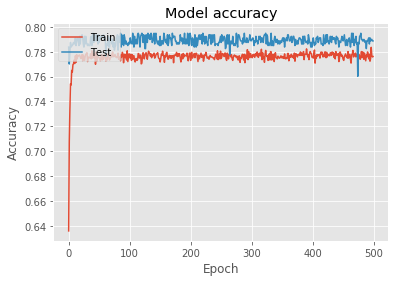

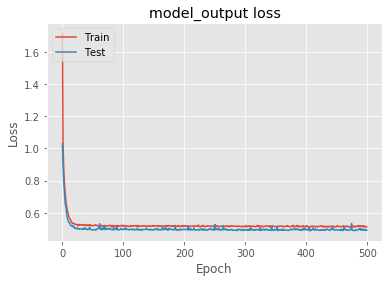

In [43]:
# Plot training & validation accuracy values
plt.plot(model_output.history['accuracy'])
plt.plot(model_output.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_output.history['loss'])
plt.plot(model_output.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [44]:
y_pred = model.predict(x_test)
rounded = [round(x[0]) for x in y_pred]
y_pred1 = np.array(rounded,dtype='int64')

In [199]:
#ROC
prob_neural = model.fit(x_train, y_train).predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, prob_rbf[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)


NameError: name 'model' is not defined

In [45]:
confusion_matrix(y_test,y_pred1)

array([[437,  83],
       [ 88, 201]])

In [46]:
precision_score(y_test,y_pred1)

0.7077464788732394

In [47]:
All = data.shape[0]
female = data[data['SEX'] == 2]
male = data[data['SEX'] == 1]

x = len(female)/All
y = len(male)/All

print('Females :',x*100,'%')
print('Males :',y*100,'%')

Females : 59.22810489856507 %
Males : 40.771895101434936 %


Text(0, 0.5, 'Frequency')

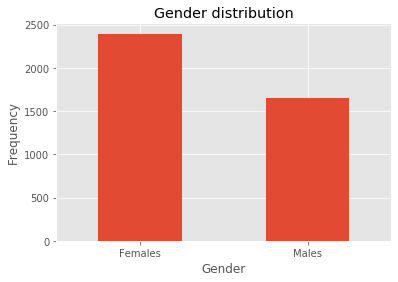

In [48]:
# Let's plot the Gender against the Frequency
labels = ['Females','Males']
classes = pd.value_counts(data['SEX'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Gender distribution")
plt.xticks(range(2), labels)
plt.xlabel("Gender")
plt.ylabel("Frequency")

Splitting the data
x_train is the training part of the matrix of features.
x_test is the test part of the matrix of features.
y_train is the training part of the dependent variable that is associated to X_train here.
y_test is the test part of the dependent variable that is associated to X_train here.

Feature Scaling 


This will help to limit the range and standerdise the variables so that they can all be compared on common grounds. If they do not have the same scale, it will cause problems to the machine learning that we will be applying later on( as most machine learning models is based on euclidean distance). This algorithm will also converge faster. 


In [49]:
data['LIMIT_BAL'] = StandardScaler().fit_transform(data['LIMIT_BAL'].values.reshape(-1,1))
data['SEX'] = StandardScaler().fit_transform(data['SEX'].values.reshape(-1,1))
data['EDUCATION'] = StandardScaler().fit_transform(data['EDUCATION'].values.reshape(-1,1))
data['MARRIAGE'] = StandardScaler().fit_transform(data['MARRIAGE'].values.reshape(-1,1))
data['AGE'] = StandardScaler().fit_transform(data['AGE'].values.reshape(-1,1))
data['PAY_2'] = StandardScaler().fit_transform(data['PAY_2'].values.reshape(-1,1))
data['PAY_3'] = StandardScaler().fit_transform(data['PAY_3'].values.reshape(-1,1))
data['PAY_4'] = StandardScaler().fit_transform(data['PAY_4'].values.reshape(-1,1))
data['PAY_5'] = StandardScaler().fit_transform(data['PAY_5'].values.reshape(-1,1))
data['BILL_AMT1'] = StandardScaler().fit_transform(data['BILL_AMT1'].values.reshape(-1,1))
data['BILL_AMT2'] = StandardScaler().fit_transform(data['BILL_AMT2'].values.reshape(-1,1))
data['BILL_AMT3'] = StandardScaler().fit_transform(data['BILL_AMT3'].values.reshape(-1,1))
data['BILL_AMT4'] = StandardScaler().fit_transform(data['BILL_AMT4'].values.reshape(-1,1))
data['BILL_AMT5'] = StandardScaler().fit_transform(data['BILL_AMT5'].values.reshape(-1,1))
data['BILL_AMT6'] = StandardScaler().fit_transform(data['BILL_AMT6'].values.reshape(-1,1))
data['PAY_AMT1'] = StandardScaler().fit_transform(data['PAY_AMT1'].values.reshape(-1,1))
data['PAY_AMT2'] = StandardScaler().fit_transform(data['PAY_AMT2'].values.reshape(-1,1))
data['PAY_AMT3'] = StandardScaler().fit_transform(data['PAY_AMT3'].values.reshape(-1,1))
data['PAY_AMT4'] = StandardScaler().fit_transform(data['PAY_AMT4'].values.reshape(-1,1))
data['PAY_AMT5'] = StandardScaler().fit_transform(data['PAY_AMT5'].values.reshape(-1,1))
data['PAY_AMT6'] = StandardScaler().fit_transform(data['PAY_AMT6'].values.reshape(-1,1))
data['default payment next month'] = StandardScaler().fit_transform(data['default payment next month'].values.reshape(-1,1))

KeyError: 'MARRIAGE'

Plot the distribution of features 

In [ ]:
#distribution of gender

In [ ]:
gender_distribution = [data['SEX'].values]
sns.distplot(gender_distribution)

In [ ]:
#distribution of anomalous feature 

In [ ]:
anomalous_features = data.iloc[:,1:29].columns
plt.figure(figsize=(12,28*4))
gs = matplotlib.gridspec.GridSpec(28, 1)
for i, cn in enumerate(data[anomalous_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data.SEX == 1], bins=50)
    sns.distplot(data[cn][data.SEX == 2], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [ ]:
data[data["Age"]]